In [8]:
import os
import numpy as np
from matplotlib import pyplot as plt

logs = ['trial_3.log', 'trial_4.log', 'trial_5.log']
results = {
    'l1_rec_coefficient': [],
    'gen_classification_coefficient': [],
    'gen_acc_leakage': [],
    'gen_l1_loss': []
}

waypoints = 0
for log in logs:
    with open(os.path.join('.', log), 'r') as F:
        while True:
            line = F.readline()
            if line == '':
                break
            if ('{' in line ) and ('}' in line):
                l1_rec_coefficient, gen_classification_coefficient = [float(x.split(',')[0]) for x in line.split(': ')[1:-1]]
                results['l1_rec_coefficient'].append(l1_rec_coefficient)
                results['gen_classification_coefficient'].append(gen_classification_coefficient)
                waypoints = 0
            if 'Starting epoch 5.' in line:
                waypoints += 1
            if waypoints == 1 and 'Done with testing phase.' in line:
                waypoints += 1
            if waypoints == 2 and 'gen_acc_leakage' in line:
                gen_acc_leakage = float(line.split(': ')[-1])
                results['gen_acc_leakage'].append(gen_acc_leakage)
            if waypoints == 2 and 'gen_l1_loss' in line:
                gen_l1_loss = float(line.split(': ')[-1])
                results['gen_l1_loss'].append(gen_l1_loss)
    num_trials = min([len(x) for x in results.values()])
    results = {key: value[:num_trials] for key, value in results.items()}
results = {key: np.array(value) for key, value in results.items()}
print([(key, len(value)) for key, value in results.items()])

[('l1_rec_coefficient', 45), ('gen_classification_coefficient', 45), ('gen_acc_leakage', 45), ('gen_l1_loss', 45)]


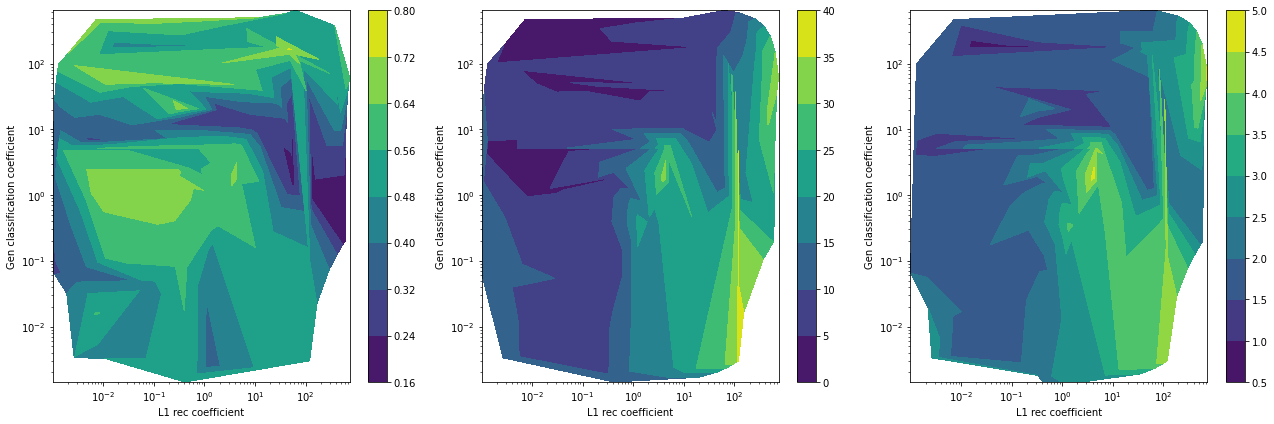

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
c0 = axes[0].tricontourf(results['l1_rec_coefficient'], results['gen_classification_coefficient'], results['gen_acc_leakage'])
c1 = axes[1].tricontourf(results['l1_rec_coefficient'], results['gen_classification_coefficient'], 1/results['gen_l1_loss'])
c2 = axes[2].tricontourf(results['l1_rec_coefficient'], results['gen_classification_coefficient'], np.sqrt(results['gen_acc_leakage']/results['gen_l1_loss']))
for ax in axes.flatten():
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('L1 rec coefficient')
    ax.set_ylabel('Gen classification coefficient')
fig.colorbar(c0, ax=axes[0])
fig.colorbar(c1, ax=axes[1])
fig.colorbar(c2, ax=axes[2])
plt.tight_layout()